<h3 style = "text-align:center;">FEATURE SCALING AND DIMENSIONALITY REDUCTION</h3>

#### Why are feature selection and dimensionality reduction important?

<p style = 'text-align:justify;'>A machine learning algorithm(such as classification, clustering, or regression) uses a training dataset to determine weight factors that can be applied to unseen data for predictive purposes. Before implementing a machine learning algorithm, it is necessary to select only relevant features in the training dataset. The process of transforming a dataset is in orde to select only relevant features necessary for training is called <b>Dimensionality Reduction</b>. Feature selection and Dimensionality Reduction are important because of three main reasons:</p>

1. **Prevent Overfitting**: A high dimensional dataset having too many features can sometimes lead to overfitting(model captures both real and random effects).



2. **Simplicity:** An over-complex model having too many features can be hard to interpret especially when features are correlated with each other.



3. **Computational Efficiency:** A model trained on a lower-dimensional dataset is computationally efficient (execution of algorithm requires less computational time)

Dimensionality reduction, therefore plays a crucial role in data preprocessing.

<p style = 'text-align:justify;'>We will illustrate the process of feature selection and dimensionality reduction with the covariance matrix plot using the cruise ship dataset, suppose we want to build a regression model to predict cruise ship <b>crew size</b> based on the following features <i>['age','tonnage','passengers','length','cabins','passengers', 'length','cabins','passenger_density']</i>. Our model can be expressed as:</p>



<p style = 'text-align:justify;'>where <b>X</b> is the feature matrix, and <b>w</b> is the weights to be learned during training. The question we would like to address is the following:
    out of the 6 features <i>['age'.'tonnage','passengers','length','cabins','passenger_density']</i>,which of these are the most important?</p>

We will determine what features will be needed for training the model.


### Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Read Dataset 

In [2]:
ship = pd.read_csv('cruise_ship_info.csv')
ship.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


In [3]:
ship[ship['Cruise_line']=='Carnival']

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00
5,Ecstasy,Carnival,22,70.367,20.52,8.55,10.20,34.29,9.20
6,Elation,Carnival,15,70.367,20.52,8.55,10.20,34.29,9.20
7,Fantasy,Carnival,23,70.367,20.56,8.55,10.22,34.23,9.20
8,Fascination,Carnival,19,70.367,20.52,8.55,10.20,34.29,9.20
9,Freedom,Carnival,6,110.239,37.00,9.51,14.87,29.79,11.50
10,Glory,Carnival,10,110.000,29.74,9.51,14.87,36.99,11.60
11,Holiday,Carnival,28,46.052,14.52,7.27,7.26,31.72,6.60


### Calculate basic statistics of the data

In [4]:
ship.shape

(158, 9)

In [5]:
ship.describe().apply(lambda s: s.apply(lambda x: format(x, '.0f')))

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
count,158,158,158,158,158,158,158
mean,16,71,18,8,9,40,8
std,8,37,10,2,4,9,4
min,4,2,1,3,0,18,1
25%,10,46,13,7,6,35,5
50%,14,72,20,9,10,39,8
75%,20,91,25,10,11,44,10
max,48,220,54,12,27,71,21


In [6]:
ship.isnull().sum()

Ship_name            0
Cruise_line          0
Age                  0
Tonnage              0
passengers           0
length               0
cabins               0
passenger_density    0
crew                 0
dtype: int64

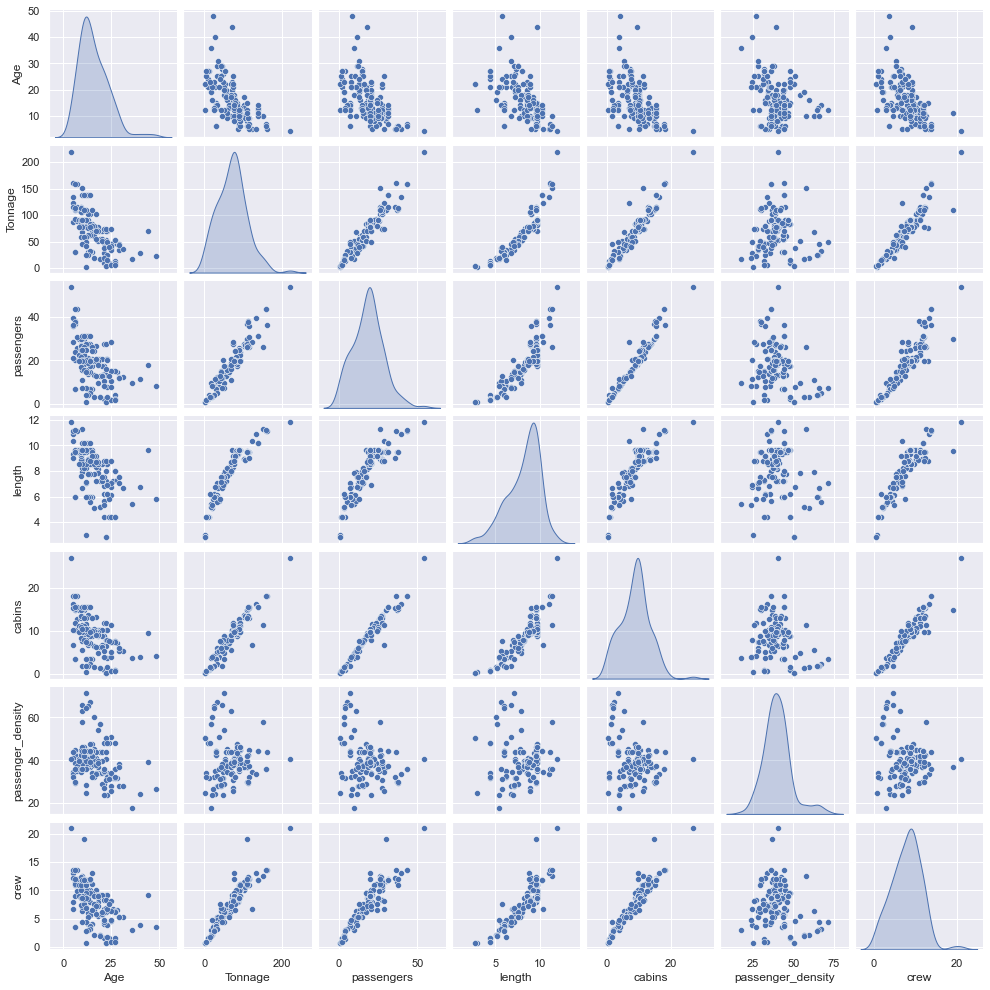

In [60]:
cols = ['Age','Tonnage','passengers','length','cabins','passenger_density','crew']
color = sns.color_palette('bright')[1]
sns.pairplot(ship[cols], diag_kind = 'kde', palette = 'PuBu', size = 2);


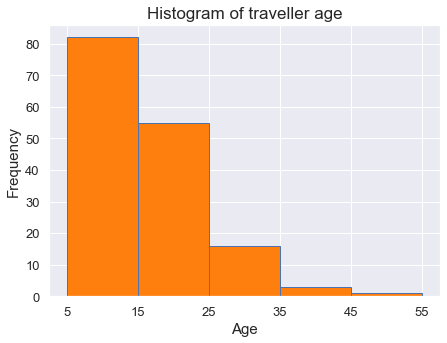

In [52]:
plt.figure(figsize=(7,5))
color = sns.color_palette('tab10')[1]
bin = [5,15,25,35,45,55]
plt.hist(ship['Age'], color=color,edgecolor='b', linewidth=1.0, bins=bin)

plt.title("Histogram of traveller age", fontsize=17)
plt.xlabel("Age",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.xticks([i for i in range(5,60,10)],fontsize=13)
plt.yticks(fontsize=13)
plt.show()

We observe from the pair plots that the target variables 'crew' correlates well with 4 predictor variables, namely, `'tonnage','passenger','length', and 'cabins'.`

To quantify the degree of correlation we calculate the covariance matrix.


### Variable Selection for predicting 'crew' size

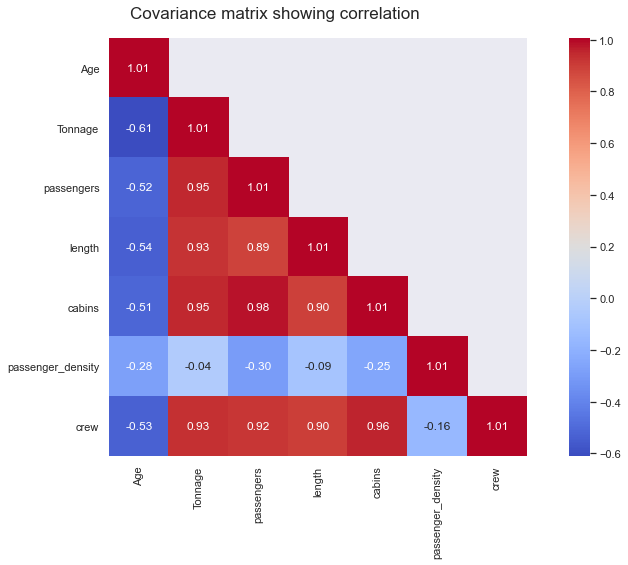

In [57]:
###Calculation of the covariance matrix
cols = ['Age','Tonnage','passengers','length','cabins','passenger_density','crew']

from sklearn.preprocessing import StandardScaler
st= StandardScaler()
X_st = st.fit_transform(ship[cols].iloc[:,range(0,7)].values)

conv_mat = np.cov(X_st.T)
plt.figure(figsize=(12,8))
sns.set(font_scale=1.0)

mask = np.triu(conv_mat, k=1)
hm = sns.heatmap(conv_mat, cbar=True,annot=True, mask = mask,square=True,
                 fmt = '.2f', annot_kws = {'size': 12}, cmap= 'coolwarm',
yticklabels = cols,xticklabels=cols)
plt.xticks(rotation=90)
plt.suptitle('Covariance matrix showing correlation',y=0.98, fontsize=17)
plt.tight_layout()
plt.show()

### Selecting important variables (columns)
From the covariance matrix plot above, if we assume important features have a correlation coefficient of 0.6 or greater, then we see that the `crew` variable correlates strongly with 4 predictors `tonnage`,`passenger`,`length`, and `cabins`.

In summary, we've shown how a covariance matrix can be used for variable selection and dimensionality reduction. We've reduced the original dimension from 6 to 4.

Other advanced methods for features selection and dimensionality reduction are **Principal Component Analysis (PCA)**, **Linear Discriminant Analysis(LDA)**, **Lasso Regression**, and **Ridge Regression**.







Credits: **Benjamin Obi Tayo (Ph.D.)**